In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("10days.csv")

In [3]:
addresses = set()
(data[["from_address", "to_address"]].apply(lambda x: addresses.add(x.from_address) and addresses.add(x.to_address), axis=1))

0          None
1          None
2          None
3          None
4          None
           ... 
5170842    None
5170843    None
5170844    None
5170845    None
5170846    None
Length: 5170847, dtype: object

In [4]:
uniques_address = len(addresses)

In [5]:
uniques_address / 3344358 * 2

0.8835274214064404

In [6]:
import seaborn as sns

In [7]:
data.columns

Index(['block_timestamp', 'transaction_index', 'nonce', 'from_address',
       'to_address', 'value', 'value_lossless', 'gas', 'gas_price',
       'max_fee_per_gas', 'max_priority_fee_per_gas', 'transaction_type'],
      dtype='object')

In [8]:
senders = data['from_address'].value_counts()
receivers = data['to_address'].value_counts()

In [9]:
senders

0xea674fdde714fd979de3edf0f56aa9716b898ec8    152428
0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511     87999
0x3cd751e6b0078be393132286c442345e5dc49699     86175
0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740     71624
0xeb2629a2734e272bcc07bda959863f316f4bd4cf     67299
                                               ...  
0x41267191ed4d3cb376bcd344783d9f89899c3c02         1
0x8984a142a18b478bd3ac1c38016f7a1a529851ac         1
0x0c5eba918dd646a5ddef865b6c12f24cd8991c45         1
0xfed78b2ec8582c7407c582a3144621bc78207db2         1
0x56e590b09048f996e3f118643b912d1f56199e0d         1
Name: from_address, Length: 1477416, dtype: int64

In [10]:
receivers

0xdac17f958d2ee523a2206206994597c13d831ec7    420751
0x7f268357a8c2552623316e2562d90e642bb538e5    391315
0x283af0b28c62c092c9727f1ee09c02ca627eb7f5    218683
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    189069
0xa090e606e30bd747d4e6245a1517ebe430f0057e    130834
                                               ...  
0x1f784250c71978827b4ca902bbb0dde08a0c6f42         1
0x075f31b4fc6e2ab2b7c4ce8db76c204ccdd3d654         1
0x8dae3c1efcba40515830819206f8f0328a5d6aff         1
0x00c16b11c994efd50f442784caf0179708431b28         1
0x00d945cc76eba5e78e17b0ac13eb1052cda40073         1
Name: to_address, Length: 1432998, dtype: int64

In [11]:
senders_dist = senders.value_counts().reset_index()
receivers_dist = receivers.value_counts().reset_index()

In [12]:
senders_dist[senders_dist.index >= 15].from_address.sum() / uniques_address

0.013554746936543263

In [13]:
receivers_dist[receivers_dist.index >= 15].to_address.sum() / uniques_address

0.004497717636738738

In [14]:
senders[(senders >= 0) & (senders <= 15)]

0x01cb3462be1c0024d0dc15e41134bfde21620e75    15
0xefe442cb23248be982d263126eca8f66e357305d    15
0x2e1cbdb695e2ed8ff755bb7934ea3b247071b893    15
0x7caf990b3d745aad698c8437691c5d7166d4adec    15
0xa8ba075e79241d0771fc4237174c1a8d67edf7d2    15
                                              ..
0x41267191ed4d3cb376bcd344783d9f89899c3c02     1
0x8984a142a18b478bd3ac1c38016f7a1a529851ac     1
0x0c5eba918dd646a5ddef865b6c12f24cd8991c45     1
0xfed78b2ec8582c7407c582a3144621bc78207db2     1
0x56e590b09048f996e3f118643b912d1f56199e0d     1
Name: from_address, Length: 1457390, dtype: int64

<Axes: xlabel='from_address', ylabel='Count'>

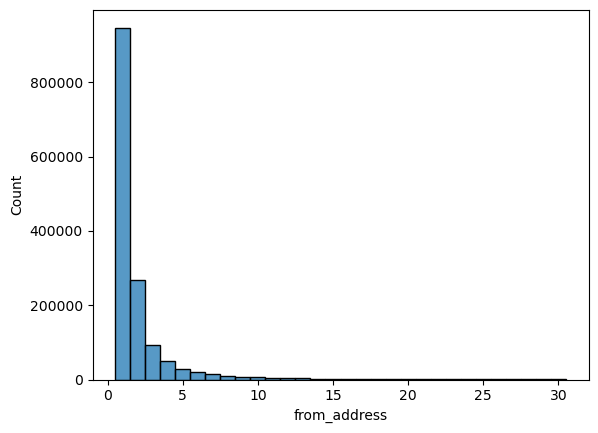

In [15]:
sns.histplot(data=senders[(senders >= 0) & (senders <= 30)], discrete=True)

<Axes: xlabel='from_address', ylabel='Count'>

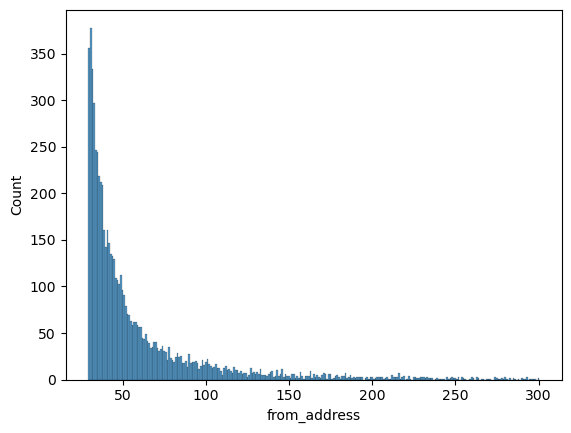

In [16]:
sns.histplot(data=senders[(senders >= 30) & (senders <= 300)], discrete=True)


In [17]:
import networkx as nx

In [18]:
g=nx.Graph()

In [19]:
def armar_grafo(frm, to, g):
    g.add_node(frm)
    g.add_node(to)
    g.add_edge(frm, to)

In [20]:
more_than_10_sent = set(senders[senders > 30].index)
more_than_10_received = set(receivers[receivers > 30].index)

In [21]:
filtered = data[data.from_address.isin(more_than_10_sent) & data.to_address.isin(more_than_10_received)]

In [22]:
filtered

,block_timestamp,transaction_index,nonce,from_address,to_address,value,value_lossless,gas,gas_price,max_fee_per_gas,max_priority_fee_per_gas,transaction_type
0,2022-05-06 17:32:23 UTC,322,293,0x61ebf1460ca709b72bf3b6f9b38ec31b46dc5336,0xdac17f958d2ee523a2206206994597c13d831ec7,0,0,50719,52259603355,5.860330e+10,1.510000e+09,2
11,2022-05-06 16:46:00 UTC,129,9262,0x88bd4d3e2997371bceefe8d9386c6b5b4de60346,0xdac17f958d2ee523a2206206994597c13d831ec7,0,0,100000,51801032875,1.410000e+11,1.364896e+09,2
12,2022-05-06 13:55:00 UTC,251,108,0x5ef6ce09160edac8074853ee2aa2b1e681a3a133,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0,0,79396,48671975266,9.383105e+10,1.340444e+09,2
13,2022-05-06 15:53:28 UTC,299,31959,0xd295879063be7a6c49f7327afaa831a4f3f64882,0x4cb18386e5d1f34dc6eea834bf3534a970a3f8e7,19975,19975,900000,48310344196,7.616762e+10,2.001950e+09,2
18,2022-05-06 14:02:17 UTC,667,199,0xceb88607e6645839e64e20c99d19622a9e516af1,0xcb2411c2b914b000ad13c86027222a797983ef2d,690000000000000000,690000000000000000,236501,1982410147879,1.982410e+12,1.797409e+12,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5170744,2022-05-04 14:33:32 UTC,36,89212,0xd5fbda4c79f38920159fe5f22df9655fde292d47,0xdac17f958d2ee523a2206206994597c13d831ec7,0,0,46121,47359353513,1.034674e+11,2.500000e+09,2
5170776,2022-05-04 12:41:34 UTC,60,21366,0x3d1d8a1d418220fd53c18744d44c182c46f47468,0xdac17f958d2ee523a2206206994597c13d831ec7,0,0,120000,36775156081,5.529981e+10,2.500000e+09,2
5170804,2022-05-07 17:21:43 UTC,179,2651,0x734ebece6d698a50cf90ac9bf15e3f16dc34a204,0x87dcb78443f9814e300f5dafe8eaf46a34832742,99900000000000000,99900000000000000,168372,30805533615,6.528774e+10,2.500000e+09,2
5170822,2022-05-03 07:29:49 UTC,106,69431,0x87cbc48075d7aa1760ac71c41e8bc289b6a31f56,0xdac17f958d2ee523a2206206994597c13d831ec7,0,0,120000,60173862573,1.000000e+12,2.500000e+09,2


In [23]:
from tqdm import tqdm
tqdm.pandas()

In [24]:
filtered[["from_address", "to_address"]].progress_apply(lambda x: armar_grafo(x.from_address, x.to_address, g), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 844055/844055 [00:18<00:00, 46491.84it/s]


0          None
11         None
12         None
13         None
18         None
           ... 
5170744    None
5170776    None
5170804    None
5170822    None
5170844    None
Length: 844055, dtype: object

In [25]:
nx.write_gexf(g, "grafo_gephi2.gexf")